In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cns = pd.read_csv('../../Data/Downloaded_Old/post_real_cns.csv')
df_emp = pd.read_csv('../../Data/Downloaded_Old/post_emp.csv')
df_cap = pd.read_csv('../../Data/Downloaded_Old/post_cap.csv')
df_GDP = pd.read_csv('../../Data/Downloaded_Old/post_GDP.csv')
df_pi  = pd.read_csv('../../Data/Downloaded_Old/post_price.csv')

In [3]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.66
α_LM  = 0.33
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.1
β     = 0.96

In [4]:
denom = 1000

columns = ['tot_cap', 'prm_cap', 'non_prm_cap']
for column in columns:
        df_cap[column] = df_cap[column] / denom

In [5]:
# calculation of intertemporal wedge requires cMt/cMt+1
df_cns['c_M_t'] = df_cns['real_non_food_cns']
df_cns['c_M_t+1'] = df_cns['real_non_food_cns'].shift(-1)

In [6]:
df_cns['c_M_t/c_M_t+1'] = df_cns['c_M_t'] / df_cns['c_M_t+1']

In [7]:
# calculation of intertemporal wedge requires cMt/cMt+1
df_cns['Pc_t'] = df_cns['real_tot_cns']
df_cns['Pc_t+1'] = df_cns['real_tot_cns'].shift(-1)

In [8]:
df_cns['Pc_t/Pc_t+1'] = df_cns['Pc_t'] / df_cns['Pc_t+1']

In [9]:
# calculation of intertemporal wedge requires cMt/cMt+1
df_pi['p_M_t'] = df_pi['pi_ind']
df_pi['p_M_t+1'] = df_pi['pi_ind'].shift(-1)

In [10]:
df_pi['p_M_t+1/p_M_t'] = df_pi['p_M_t+1'] / df_pi['p_M_t']

In [11]:
# calculation of intertemporal wedge requires cMt/cMt+1
df_pi['p_t'] = df_pi['pi_goods']
df_pi['p_t+1'] = df_pi['pi_goods'].shift(-1)

In [12]:
df_pi['p_t+1/p_t'] = df_pi['p_t+1'] / df_pi['p_t']

In [13]:
df_GDP['year_jpn']  = df_GDP.year_jpn.astype(int)

In [14]:
df_GDP_cap = pd.merge(df_GDP[['year_wst', 'year_jpn', 'non_prm_GDP', 'tot_prv_GDP']],
                      df_cap[['year_jpn', 'non_prm_cap', 'tot_cap']], on = 'year_jpn')

In [15]:
df_GDP_cap['F_KM'] = α_KM * df_GDP_cap['non_prm_GDP'] / df_GDP_cap['non_prm_cap']

In [16]:
# real return on capital 
# note that we need α_KM * Y_M_t+1/K_M_t
df_GDP_cap['real_roc'] = 1 - δ + df_GDP_cap['F_KM'].shift(-1)

In [17]:
df_temp = pd.merge(df_GDP_cap[['year_wst', 'F_KM']], 
                     df_cns[['year_wst', 'c_M_t/c_M_t+1']],
                    on = 'year_wst')

In [18]:
df_merged = pd.merge(df_temp, df_pi[['year_wst', 'p_M_t+1/p_M_t', 'p_M_t']],
                     on = 'year_wst', how = 'inner')

In [19]:
df_merged['intertemporal_wedge'] = β * df_merged['c_M_t/c_M_t+1'] \
                                     * (df_merged['F_KM'].shift(-1) / df_merged['p_M_t']
                                        + (1-δ) * df_merged['p_M_t+1/p_M_t'])

In [20]:
df_merged['intertemporal_wedge-1'] = df_merged['intertemporal_wedge'] - 1

In [21]:
df_merged['intertemporal_wedge_test'] = β * df_merged['c_M_t/c_M_t+1'] * df_merged['p_M_t+1/p_M_t'] \
                                     * (df_merged['F_KM'].shift(-1) +1 - δ)

In [22]:
df_merged['intertemporal_wedge_test-1'] = df_merged['intertemporal_wedge_test'] - 1

<AxesSubplot:xlabel='year_wst'>

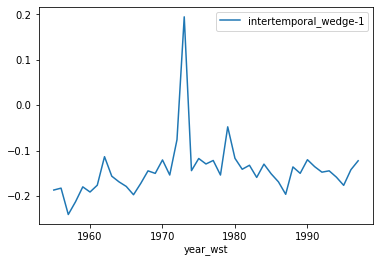

In [23]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'intertemporal_wedge-1', ax = ax)

<AxesSubplot:xlabel='year_wst'>

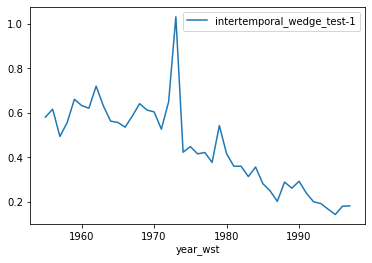

In [24]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'intertemporal_wedge_test-1', ax = ax)

<AxesSubplot:xlabel='year_wst'>

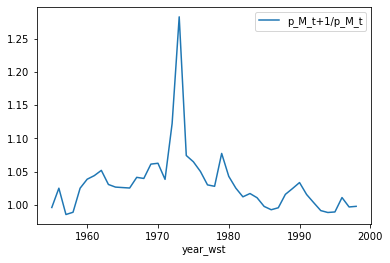

In [25]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'p_M_t+1/p_M_t', ax = ax)

<AxesSubplot:xlabel='year_wst'>

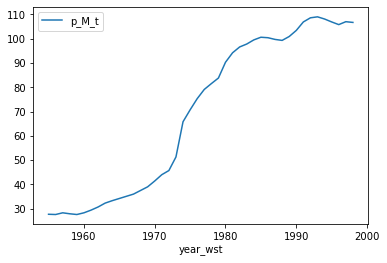

In [26]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'p_M_t', ax = ax)

<AxesSubplot:xlabel='year_wst'>

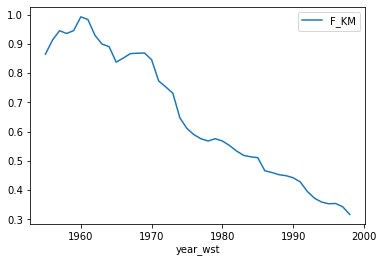

In [27]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'F_KM', ax = ax)

<AxesSubplot:xlabel='year_wst'>

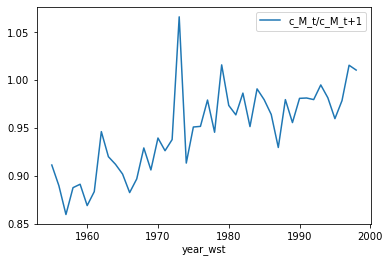

In [28]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'c_M_t/c_M_t+1', ax = ax)

<AxesSubplot:xlabel='year_wst'>

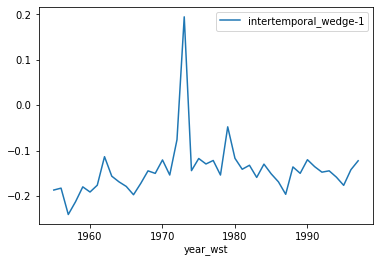

In [29]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'intertemporal_wedge-1', ax = ax)

<AxesSubplot:xlabel='year_wst'>

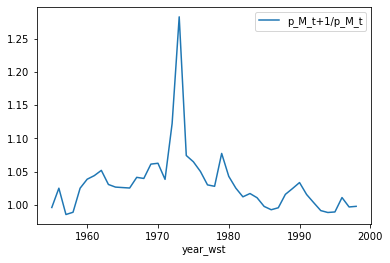

In [30]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'p_M_t+1/p_M_t', ax = ax)

<AxesSubplot:xlabel='year_wst'>

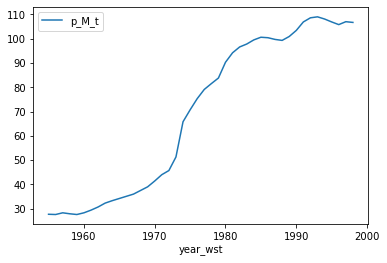

In [31]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'p_M_t', ax = ax)

In [32]:
df_merged['F_KM/p_M'] = df_merged['F_KM'] / df_merged['p_M_t']

<AxesSubplot:xlabel='year_wst'>

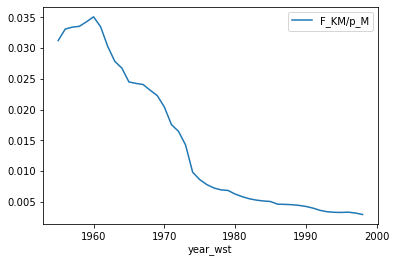

In [33]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'F_KM/p_M', ax = ax)

<AxesSubplot:xlabel='year_wst'>

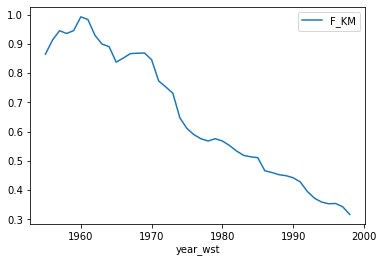

In [34]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'F_KM', ax = ax)

<AxesSubplot:xlabel='year_wst'>

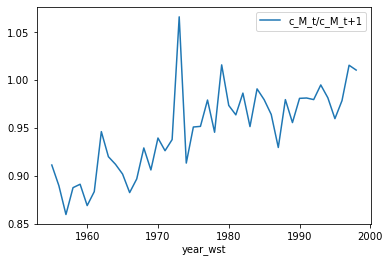

In [35]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'c_M_t/c_M_t+1', ax = ax)

In [36]:
df_merged['C_t/C_t+1'] = df_merged['c_M_t/c_M_t+1'] * df_merged['p_M_t+1/p_M_t']

<AxesSubplot:xlabel='year_wst'>

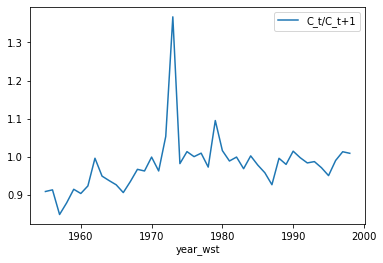

In [37]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'C_t/C_t+1', ax = ax)

In [38]:
df_merged['C_t+1/C_t'] = 1/ df_merged['C_t/C_t+1']

<AxesSubplot:xlabel='year_wst'>

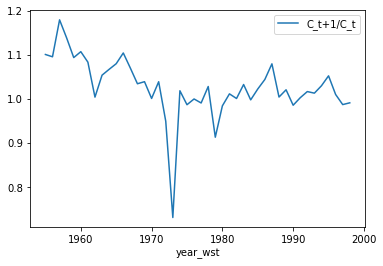

In [39]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'C_t+1/C_t', ax = ax)

In [40]:
df_merged['roc_real'] = df_merged['F_KM'].shift(-1) / df_merged['p_M_t'] + 1 - δ

<AxesSubplot:xlabel='year_wst'>

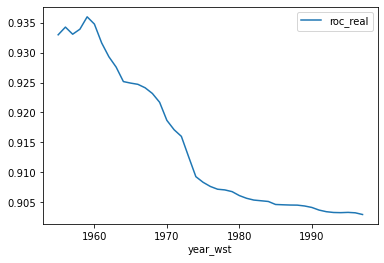

In [41]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'roc_real', ax = ax)

In [42]:
df_merged['roc_test'] = df_merged['F_KM'].shift(-1)  + 1 -δ

<AxesSubplot:xlabel='year_wst'>

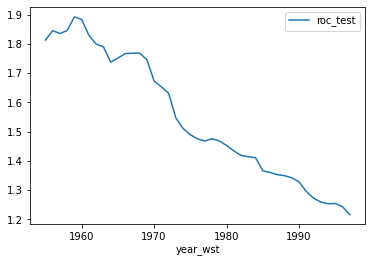

In [43]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'roc_test', ax = ax)

In [44]:
#df_merged.to_csv('../../Data/Results/post_inter_w.csv', index = False)

In [45]:
df_merged.loc[:15]['intertemporal_wedge-1'].mean()

-0.1728717215508013

<AxesSubplot:xlabel='year_wst'>

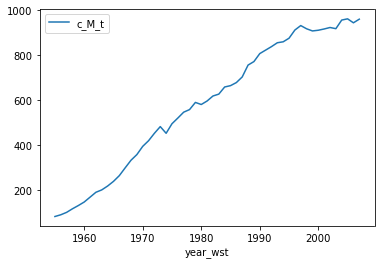

In [46]:
fig, ax = plt.subplots()
df_cns.plot(x = 'year_wst', y = 'c_M_t', ax = ax)

In [47]:
df_GDP_cap['F_K'] = df_GDP_cap['tot_prv_GDP'] / df_GDP_cap['tot_cap'] * α_KM

In [48]:
df_temp2 = pd.merge(df_GDP_cap[['year_wst', 'F_K']], 
                     df_cns[['year_wst', 'Pc_t/Pc_t+1']],
                    on = 'year_wst')

In [49]:
df_merged2 = pd.merge(df_temp2, df_pi[['year_wst', 'p_t+1/p_t', 'p_t']],
                     on = 'year_wst', how = 'inner')

In [96]:
rho = 3
δ = 0.05

In [97]:
df_merged2['intertemporal_wedge_test_rho2'] = β * (df_merged2['Pc_t/Pc_t+1'] * df_merged2['p_t+1/p_t']) ** rho \
                                     * (df_merged2['F_K'].shift(-1) +1 - δ)

In [98]:
df_merged2['intertemporal_wedge_test_rho1'] = β * (df_merged2['Pc_t/Pc_t+1'] * df_merged2['p_t+1/p_t'])  \
                                     * (df_merged2['F_K'].shift(-1) +1 - δ)

<AxesSubplot:xlabel='year_wst'>

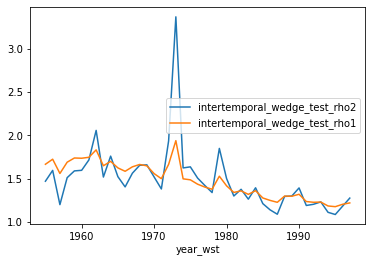

In [99]:
fig, ax = plt.subplots()
df_merged2.plot(x = 'year_wst', y = 'intertemporal_wedge_test_rho2', ax = ax)
df_merged2.plot(x = 'year_wst', y = 'intertemporal_wedge_test_rho1', ax = ax)

In [68]:
df_merged2['c_t/c_t+1']  = df_merged2['Pc_t/Pc_t+1'] * df_merged2['p_t+1/p_t']

<AxesSubplot:xlabel='year_wst'>

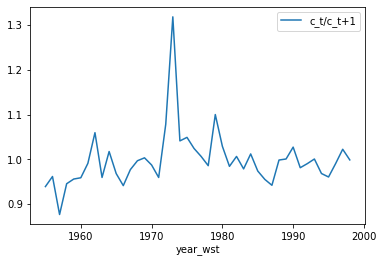

In [69]:
fig, ax = plt.subplots()
df_merged2.plot(x = 'year_wst', y = 'c_t/c_t+1', ax = ax)

In [70]:
df_merged2['cns_growth']  = 1/ df_merged2['c_t/c_t+1']

<AxesSubplot:xlabel='year_wst'>

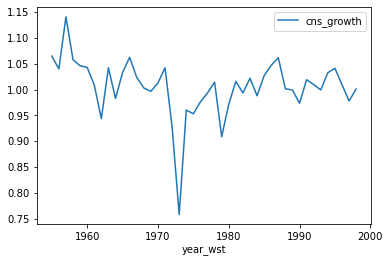

In [71]:
fig, ax = plt.subplots()
df_merged2.plot(x = 'year_wst', y = 'cns_growth', ax = ax)

<AxesSubplot:xlabel='year_wst'>

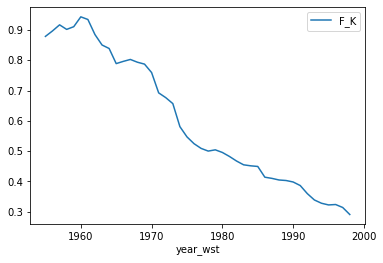

In [72]:
fig, ax = plt.subplots()
df_merged2.plot(x = 'year_wst', y = 'F_K', ax = ax)